## Bike Price Prediction – EDA and Machine Learning Model


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Used_Bikes.csv')
df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [4]:
df.shape

(32648, 8)

In [5]:
df.insert(0, 'srno', range(1, len(df) + 1))

In [6]:
df.describe()

,srno,price,kms_driven,age,power
count,32648.000000,3.264800e+04,32648.000000,32648.000000,32648.000000
mean,16324.500000,6.829542e+04,26344.625184,8.048211,213.511302
std,9424.810131,9.071860e+04,22208.527695,4.031700,134.428868
min,1.000000,4.400000e+03,1.000000,1.000000,100.000000
25%,8162.750000,2.500000e+04,12000.000000,5.000000,150.000000
50%,16324.500000,4.300000e+04,20373.000000,7.000000,150.000000
75%,24486.250000,8.000000e+04,35000.000000,10.000000,220.000000
max,32648.000000,1.900000e+06,750000.000000,63.000000,1800.000000


In [7]:
df.isnull().sum()

srno          0
bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.columns

Index(['srno', 'bike_name', 'price', 'city', 'kms_driven', 'owner', 'age',
       'power', 'brand'],
      dtype='object')

In [10]:
df.dtypes

srno            int64
bike_name      object
price         float64
city           object
kms_driven    float64
owner          object
age           float64
power         float64
brand          object
dtype: object

In [11]:
df['age']=df['age'].astype(int)

In [12]:
df['kms_driven']=df['kms_driven'].astype(int)

In [13]:
df.dtypes

srno            int64
bike_name      object
price         float64
city           object
kms_driven      int64
owner          object
age             int64
power         float64
brand          object
dtype: object

In [14]:
df.head(2)

,srno,bike_name,price,city,kms_driven,owner,age,power,brand
0,1,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654,First Owner,3,110.0,TVS
1,2,Royal Enfield Classic 350cc,119900.0,Delhi,11000,First Owner,4,350.0,Royal Enfield


In [15]:
categorical_cols=[i for i in df.columns if df[i].dtypes=='O']
categorical_cols

['bike_name', 'city', 'owner', 'brand']

In [16]:
for i in categorical_cols:
    df[i]=df[i].str.strip()

In [17]:
for i in categorical_cols:
    print(f"column: {i}")
    print(df[i].unique())
    print(f"--"*20)

column: bike_name
['TVS Star City Plus Dual Tone 110cc' 'Royal Enfield Classic 350cc'
 'Triumph Daytona 675R' 'TVS Apache RTR 180cc'
 'Yamaha FZ S V 2.0 150cc-Ltd. Edition' 'Yamaha FZs 150cc'
 'Honda CB Hornet 160R  ABS DLX' 'Hero Splendor Plus Self Alloy 100cc'
 'Royal Enfield Thunderbird X 350cc'
 'Royal Enfield Classic Desert Storm 500cc' 'Yamaha YZF-R15 2.0 150cc'
 'Yamaha FZ25 250cc' 'Bajaj Pulsar NS200' 'Bajaj Discover 100M'
 'Bajaj Discover 125M' 'Bajaj Pulsar NS200 ABS' 'Bajaj Pulsar RS200 ABS'
 'Suzuki Gixxer SF 150cc' 'Benelli 302R 300CC'
 'Hero Splendor iSmart Plus IBS 110cc'
 'Royal Enfield Classic Chrome 500cc' 'Yamaha FZ V 2.0 150cc'
 'Hero Super Splendor 125cc' 'Honda CBF Stunner 125cc'
 'Bajaj Pulsar 150cc' 'Honda X-Blade 160CC ABS' 'Bajaj Avenger 220cc'
 'KTM RC 390cc' 'Honda CB Unicorn 150cc' 'KTM Duke 200cc'
 'Honda CBR 150R 150cc' 'Royal Enfield Thunderbird X 500cc'
 'KTM RC 200cc ABS' 'Royal Enfield Thunderbird 350cc'
 'Royal Enfield Bullet Electra 350cc' 'Bajaj Av

In [18]:
df.shape[0]

32648

In [19]:
df.drop('srno',axis=1,inplace=True)
df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654,First Owner,3,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000,First Owner,4,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110,First Owner,8,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329,First Owner,4,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000,First Owner,3,150.0,Yamaha


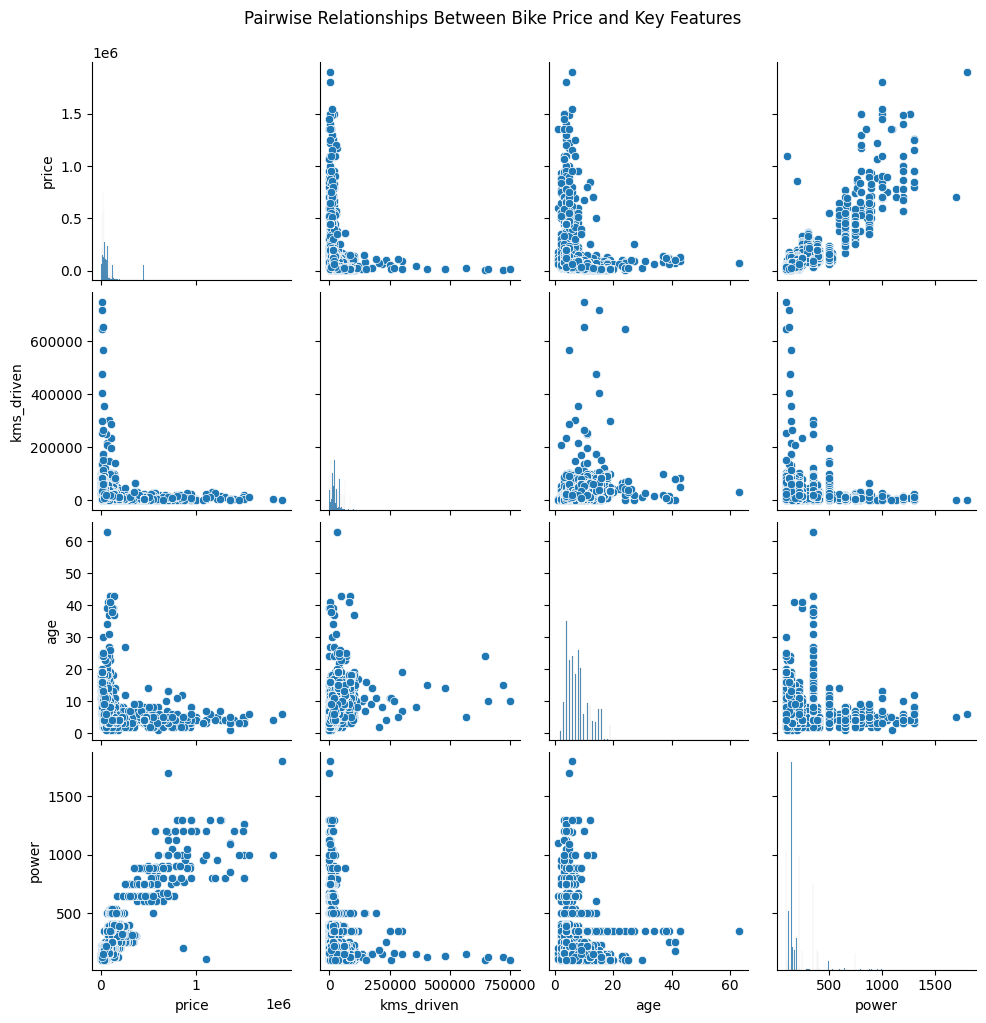

In [20]:

sns.pairplot(df)
plt.suptitle("Pairwise Relationships Between Bike Price and Key Features", y=1.02)
plt.show()

From the above pairplot, we can conclude that bikes with higher engine capacity (cc) generally have higher prices. The age of the bike also affects the price, as newer bikes tend to be priced higher compared to older ones. Additionally, kilometers driven has a significant impact on price; bikes with higher kilometers driven usually sell for lower prices, while bikes with lower mileage are sold at higher prices.

In [21]:
numerical_cols=[i for i in df.columns if df[i].dtypes!='O']
numerical_cols

['price', 'kms_driven', 'age', 'power']

In [22]:
for pos,col_name in enumerate(numerical_cols):
    print(f"{pos}-{col_name}")

0-price
1-kms_driven
2-age
3-power


In [23]:
for pos,col_name in enumerate(numerical_cols,start=1):
    print(f"{pos}-{col_name}")

1-price
2-kms_driven
3-age
4-power


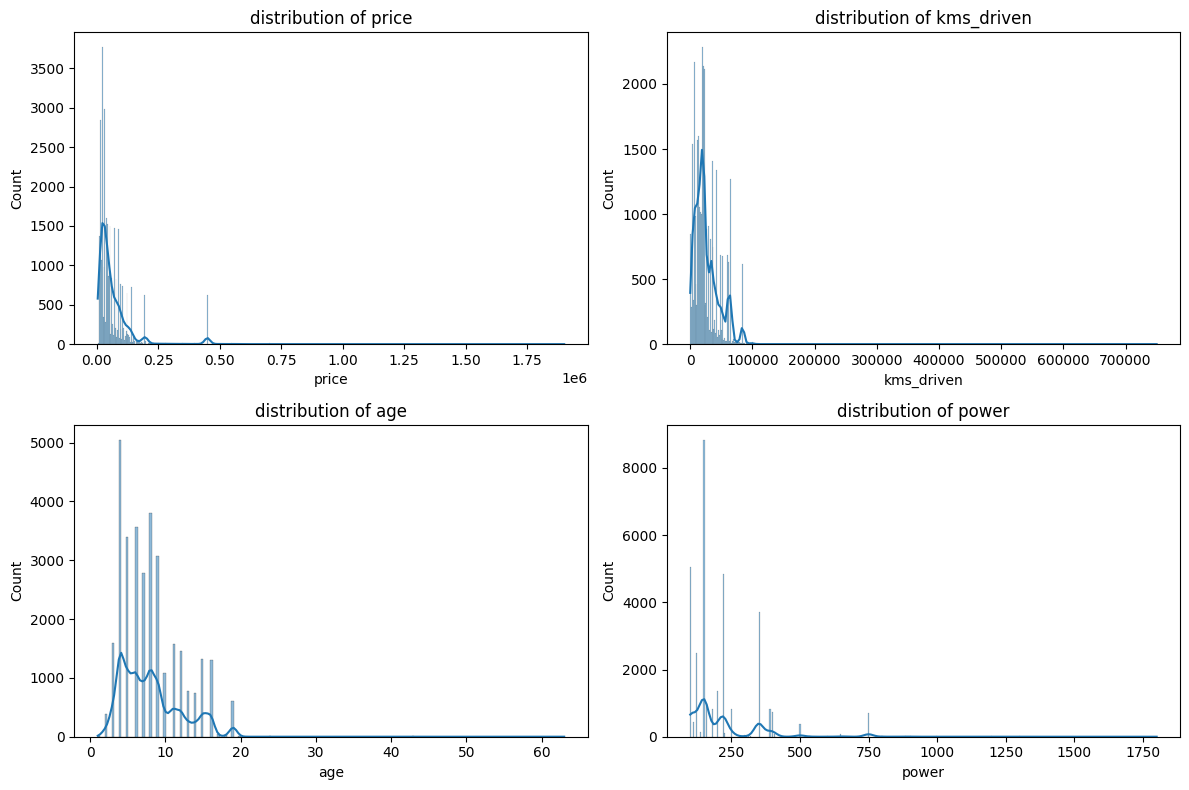

In [24]:
def plotting(col_name,pos):
    plt.subplot(2,2,pos)

    sns.histplot(df[col_name],kde=True)
    plt.title(f"distribution of {col_name}")

plt.figure(figsize=(12,8))
for pos,col in enumerate(numerical_cols,start=1):
    plotting(col,pos)

plt.tight_layout()
plt.show()

In [25]:
# total bikes 
df.shape[0]

32648

In [26]:
df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654,First Owner,3,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000,First Owner,4,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110,First Owner,8,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329,First Owner,4,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000,First Owner,3,150.0,Yamaha


29,964 bikes had one owner, 2,564 bikes had two owners, 108 bikes had three owner and 12 bikes had 4 or more

In [27]:
print("Average Price of bikes:",df['price'].mean())

Average Price of bikes: 68295.41763660868


In [28]:
print("Minimum Price of bikes:",df['price'].min())
print("Maximum Price of bikes:",df['price'].max())

Minimum Price of bikes: 4400.0
Maximum Price of bikes: 1900000.0


In [29]:
df['price'].idxmax()

367

In [30]:
df.iloc[367]

bike_name     Indian Chief Classic 1800cc
price                           1900000.0
city                              Chennai
kms_driven                           1700
owner                         First Owner
age                                     6
power                              1800.0
brand                              Indian
Name: 367, dtype: object

In [31]:
df.loc[df['price'].idxmax()]

bike_name     Indian Chief Classic 1800cc
price                           1900000.0
city                              Chennai
kms_driven                           1700
owner                         First Owner
age                                     6
power                              1800.0
brand                              Indian
Name: 367, dtype: object

In [32]:
df.loc[df['price'].idxmax()]

bike_name     Indian Chief Classic 1800cc
price                           1900000.0
city                              Chennai
kms_driven                           1700
owner                         First Owner
age                                     6
power                              1800.0
brand                              Indian
Name: 367, dtype: object

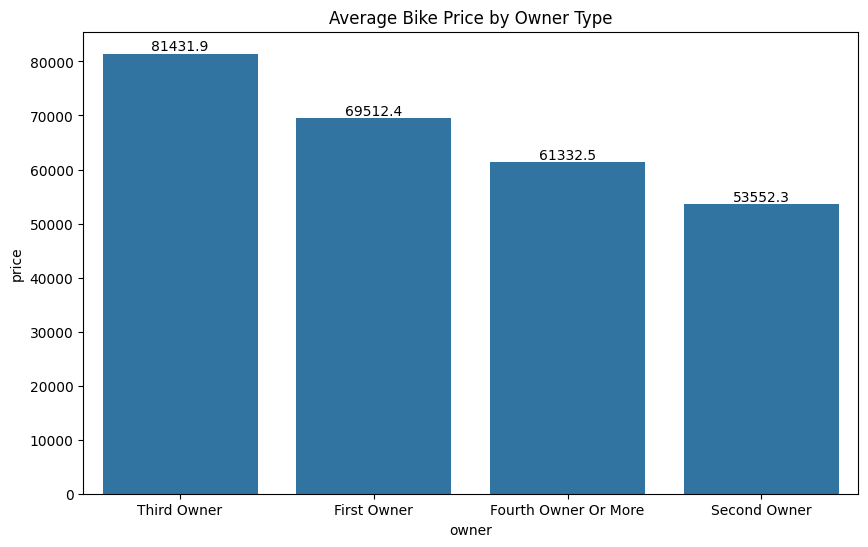

In [33]:
gb2=df.groupby('owner')['price'].mean().reset_index().sort_values(by='price',ascending=False)

plt.figure(figsize=(10,6))
ax=sns.barplot(x='owner',y='price',data=gb2)
plt.title("Average Bike Price by Owner Type")
for bar in ax.containers:
    ax.bar_label(bar)
plt.show()

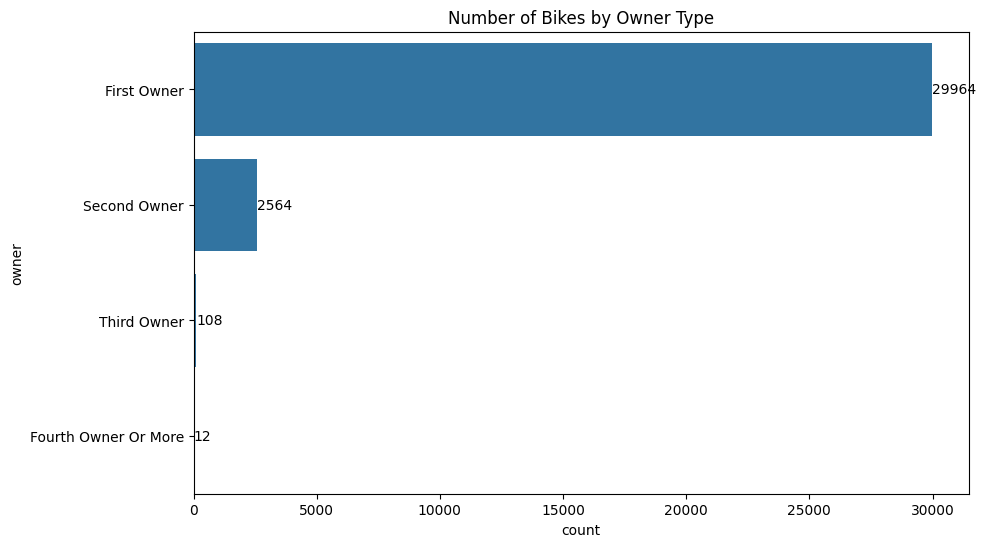

In [34]:
plt.figure(figsize=(10,6))
ax=sns.countplot(df['owner'])

plt.title("Number of Bikes by Owner Type")
for bar in ax.containers:
    ax.bar_label(bar)
plt.show()

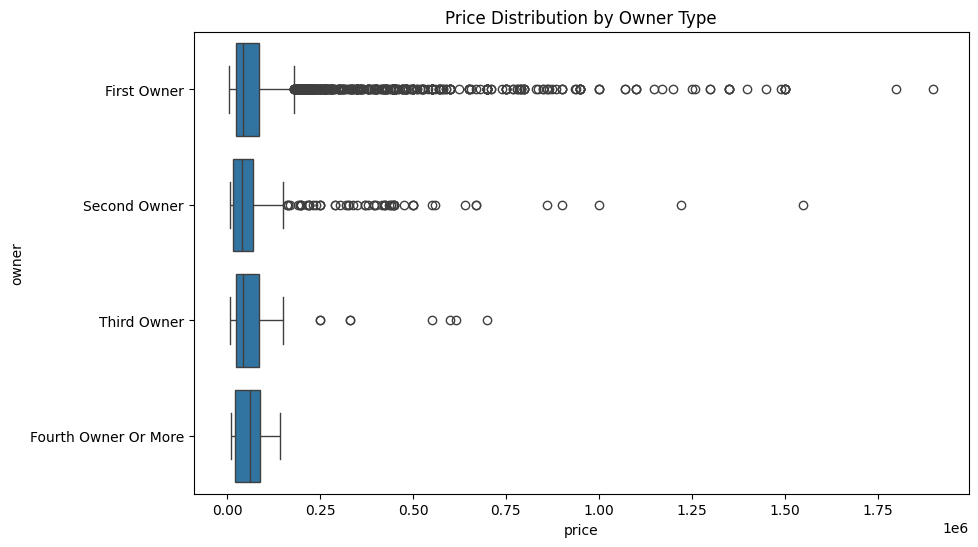

In [35]:
plt.figure(figsize=(10,6))
sns.boxplot(x='price', y='owner', data=df)
plt.title("Price Distribution by Owner Type")
plt.show()


In [36]:
pd.options.display.float_format = '{:,.0f}'.format

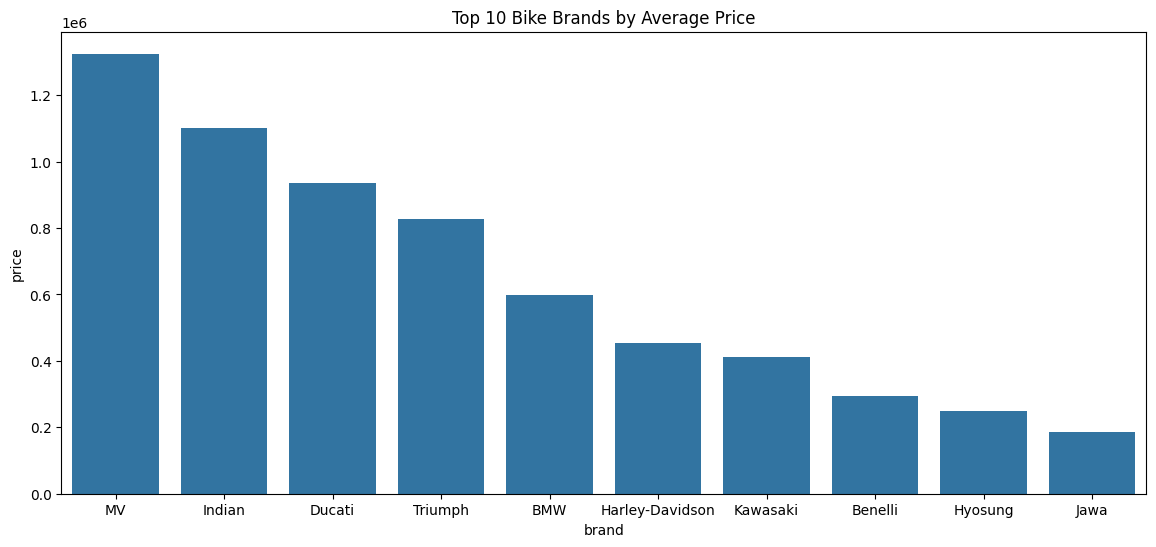

In [37]:
gb3=df.groupby('brand')['price'].mean().reset_index().sort_values(by='price',ascending=False).head(10)

plt.figure(figsize=(14,6))
plt.title("Top 10 Bike Brands by Average Price")
sns.barplot(x='brand',y='price',data=gb3)
plt.show()

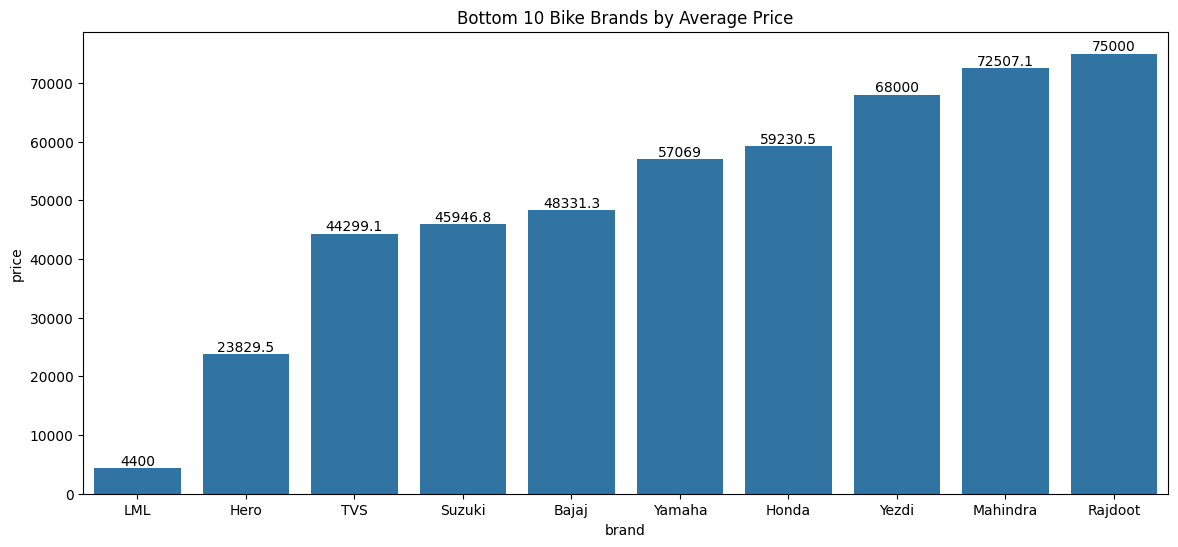

In [38]:
gb3=df.groupby('brand')['price'].mean().reset_index().sort_values(by='price',ascending=False).tail(10)
gb4=gb3.sort_values(by='price',ascending=True)
plt.figure(figsize=(14,6))
plt.title("Bottom 10 Bike Brands by Average Price")
ax=sns.barplot(x='brand',y='price',data=gb4)
for bar in ax.containers:
    ax.bar_label(bar)
plt.show()

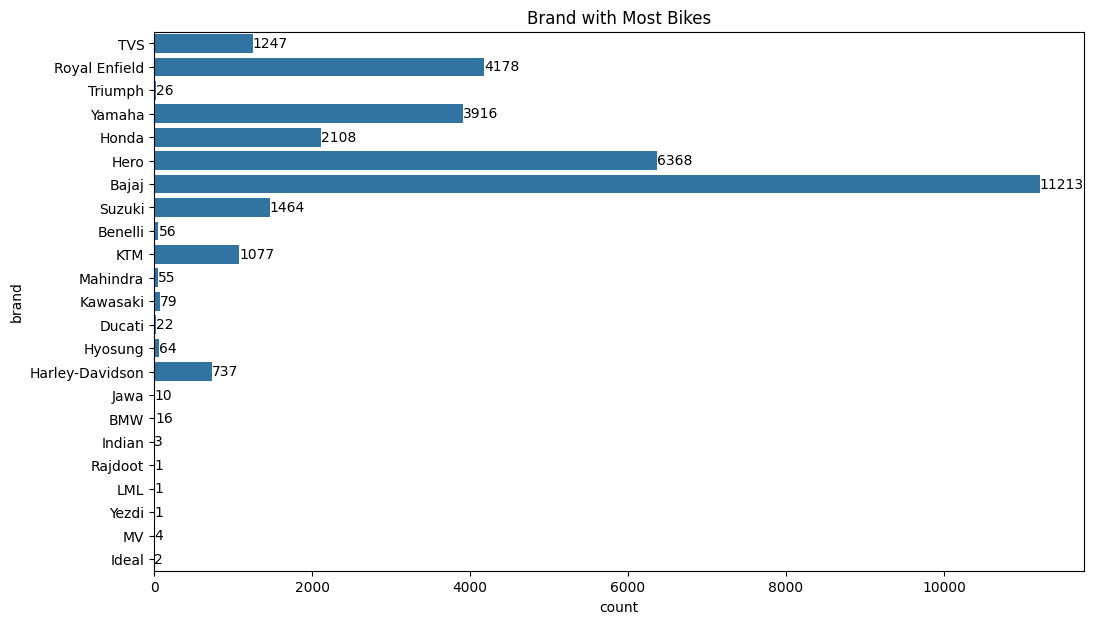

In [39]:

plt.figure(figsize=(12,7))
plt.title("Brand with Most Bikes")
ax=sns.countplot(df['brand'])
for bar in ax.containers:
    ax.bar_label(bar)
plt.show()

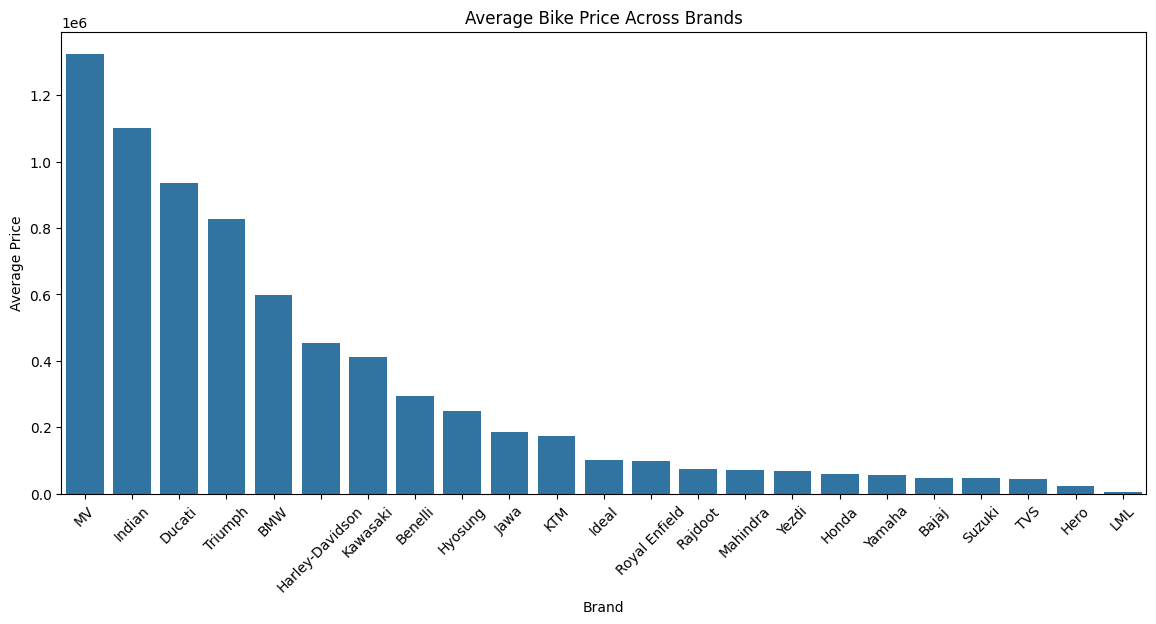

In [40]:
gb5=df.groupby('brand')['price'].mean().reset_index().sort_values(by='price', ascending=False)

plt.figure(figsize=(14,6))
sns.barplot(x='brand', y='price', data=gb5)
plt.title("Average Bike Price Across Brands")
plt.xlabel("Brand")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()



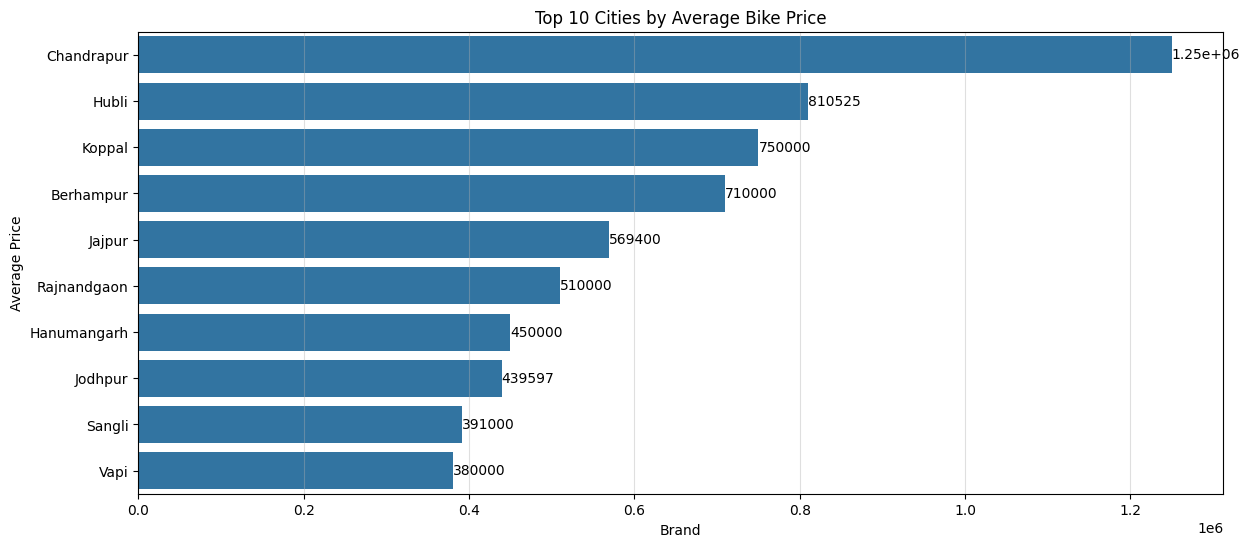

In [41]:
gb6=df.groupby('city')['price'].mean().reset_index().sort_values(by='price',ascending=False).head(10)

plt.figure(figsize=(14,6))
ax=sns.barplot(x='price', y='city', data=gb6)
for bar in ax.containers:
    ax.bar_label(bar)
plt.title("Top 10 Cities by Average Bike Price")
plt.xlabel("Brand")
plt.ylabel("Average Price")
plt.grid(axis='x',alpha=0.4)
plt.show()

In [42]:
gb6.loc[gb6['price'].idxmax()]

city     Chandrapur
price     1,250,000
Name: 97, dtype: object

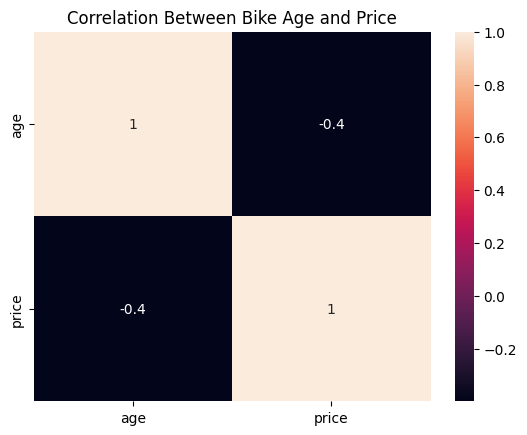

In [43]:
corr1=df[['age','price']].corr()
plt.title("Correlation Between Bike Age and Price")
sns.heatmap(corr1,annot=True)
plt.show()

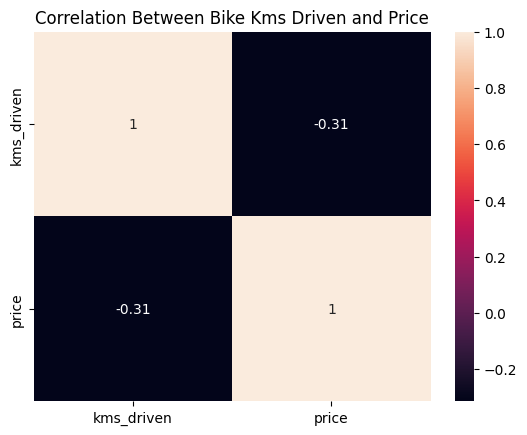

In [44]:
corr2=df[['kms_driven','price']].corr()
plt.title("Correlation Between Bike Kms Driven and Price")
sns.heatmap(corr2,annot=True)
plt.show()

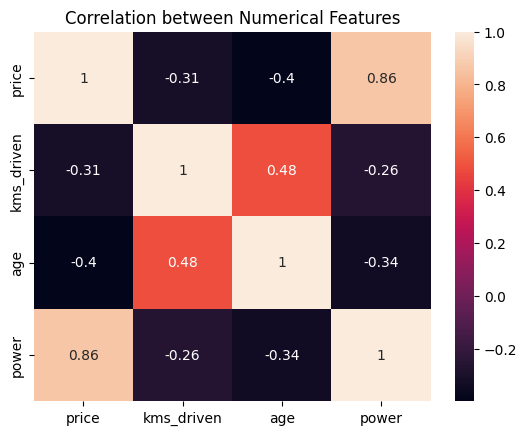

In [45]:
corr3=df[numerical_cols].corr()
plt.title("Correlation between Numerical Features")
sns.heatmap(corr3,annot=True)
plt.show()

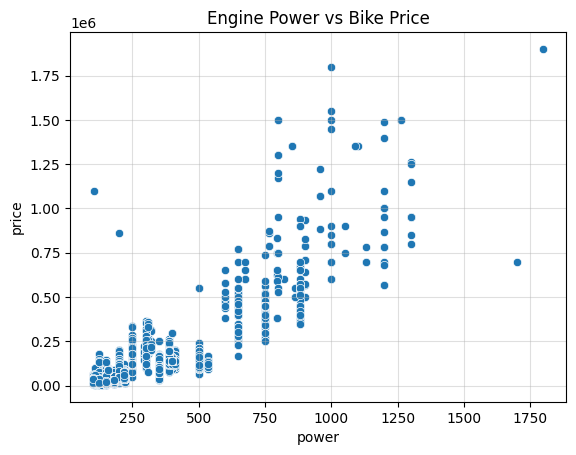

In [46]:
sns.scatterplot(x='power',y='price',data=df)
plt.title("Engine Power vs Bike Price")
plt.grid(True,alpha=0.4)

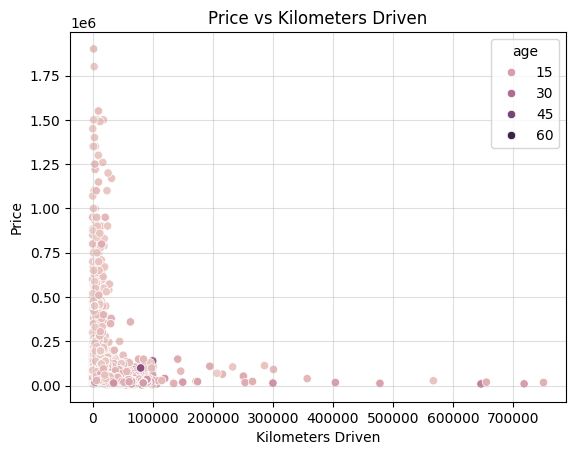

In [47]:
sns.scatterplot(x='kms_driven', y='price', hue='age', data=df)
plt.title("Price vs Kilometers Driven")
plt.xlabel("Kilometers Driven")
plt.ylabel("Price")
plt.grid(True,alpha=0.4)
plt.show()

In [48]:

df2 = df.groupby(['owner', 'brand'])['price'].mean().reset_index()

df2['owner'] = pd.Categorical(
    df2['owner'],
    categories=[
        'First Owner',
        'Second Owner',
        'Third Owner',
        'Fourth Owner Or More'
    ],
    ordered=True
)

df2 = df2.sort_values(by=['owner', 'price'], ascending=[True, False])

df2


,owner,brand,price
13,First Owner,MV,"1,325,000"
8,First Owner,Indian,"1,100,000"
3,First Owner,Ducati,"918,100"
18,First Owner,Triumph,"883,700"
0,First Owner,BMW,"598,750"
4,First Owner,Harley-Davidson,"454,337"
11,First Owner,Kawasaki,"427,823"
2,First Owner,Benelli,"308,308"
7,First Owner,Hyosung,"248,739"
9,First Owner,Jawa,"185,500"


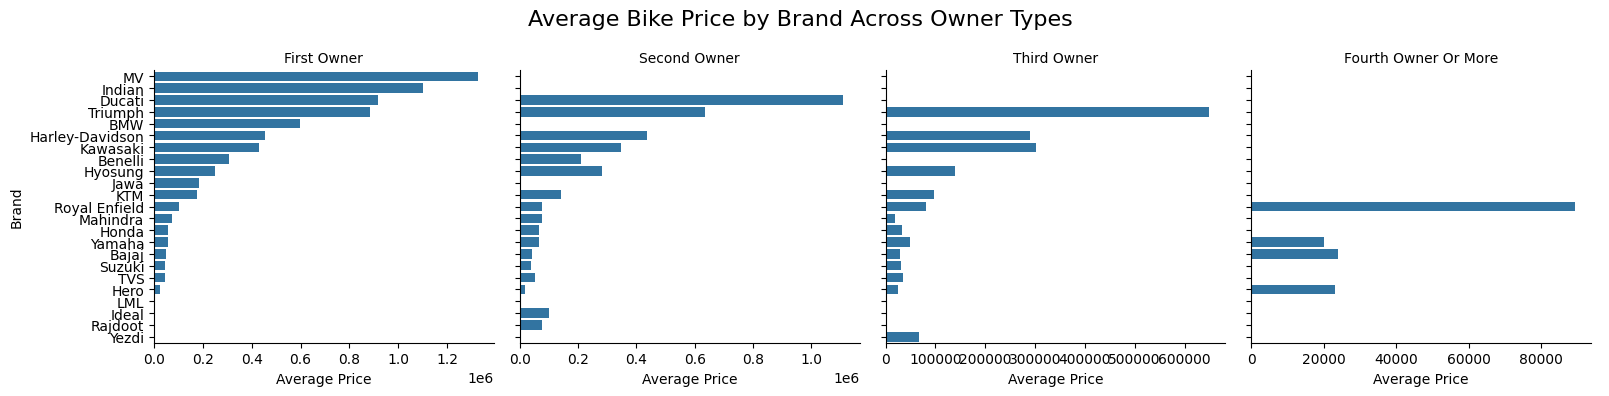

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.catplot(
    data=df2,
    x='price',
    y='brand',
    col='owner',
    kind='bar',
    col_wrap=4,
    height=4,
    sharex=False
)
plt.suptitle(
    "Average Bike Price by Brand Across Owner Types",
    fontsize=16
)
g.set_titles("{col_name}")
g.set_axis_labels("Average Price", "Brand")

plt.tight_layout()
plt.show()


In [50]:
df['bike_name'].nunique()

471

In [51]:
df.drop('bike_name',axis=1,inplace=True)

In [52]:
df['city'].unique()

array(['Ahmedabad', 'Delhi', 'Bangalore', 'Mumbai', 'Kalyan', 'Faridabad',
       'Mettur', 'Hyderabad', 'Kaithal', 'Gurgaon', 'Pune', 'Noida',
       'Nashik', 'Kochi', 'Allahabad', 'Samastipur', 'Nadiad', 'Lucknow',
       'Jaipur', 'Karnal', 'Gorakhpur', 'Vidisha', 'Hosur', 'Bagalkot',
       'Baripara', 'Agra', 'Dharwad', 'Vadodara', 'Jalandhar', 'Surat',
       'Chennai', 'Navi Mumbai', 'Gandhidham', 'Visakhapatnam',
       'Thrissur', 'Kolkata', 'Ernakulam', 'Barasat', 'Ghaziabad',
       'Bhubaneshwar', 'Amritsar', 'Bhopal', 'Hamirpur(hp)', 'Kottayam',
       'Arrah', 'Patiala', 'Ranga Reddy', 'Mandi', 'Ludhiana', 'Mandya',
       'Siliguri', 'Aurangabad', 'Kanpur', 'Bhilwara', 'Meerut', 'Rewari',
       'Ahmednagar', 'Wardha', 'Chandigarh', 'Ranchi', 'Panvel', 'Thane',
       'Jabalpur', 'Kota', 'Rohtak', 'Rajkot', 'Varanasi', '24 Pargana',
       'Banka', 'Nagpur', 'Banki', 'Pali', 'Chhatarpur', 'Katihar',
       'Mohali', 'Rudrapur', 'Coimbatore', 'Jajpur', 'Mysore', 'Adoni',

In [53]:
avg_of_city=df.groupby('city')['price'].mean()

df['city_encoded']=df['city'].map(avg_of_city)

In [54]:
df.drop('city',axis=1,inplace=True)

In [55]:
df['brand'].unique()

array(['TVS', 'Royal Enfield', 'Triumph', 'Yamaha', 'Honda', 'Hero',
       'Bajaj', 'Suzuki', 'Benelli', 'KTM', 'Mahindra', 'Kawasaki',
       'Ducati', 'Hyosung', 'Harley-Davidson', 'Jawa', 'BMW', 'Indian',
       'Rajdoot', 'LML', 'Yezdi', 'MV', 'Ideal'], dtype=object)

In [56]:
X=df.drop('price',axis=1)
y=df['price']

In [57]:
X

,kms_driven,owner,age,power,brand,city_encoded
0,17654,First Owner,3,110,TVS,"45,176"
1,11000,First Owner,4,350,Royal Enfield,"60,534"
2,110,First Owner,8,675,Triumph,"60,534"
3,16329,First Owner,4,180,TVS,"60,673"
4,10000,First Owner,3,150,Yamaha,"60,673"
...,...,...,...,...,...,...
32643,22000,First Owner,4,100,Hero,"60,534"
32644,6639,First Owner,9,180,TVS,"30,496"
32645,20373,First Owner,6,220,Bajaj,"60,534"
32646,84186,First Owner,16,125,Hero,"33,275"


In [58]:
y

0        35,000
1       119,900
2       600,000
3        65,000
4        80,000
          ...  
32643    39,000
32644    30,000
32645    60,000
32646    15,600
32647    22,000
Name: price, Length: 32648, dtype: float64

In [59]:
X.select_dtypes(exclude='object').columns

Index(['kms_driven', 'age', 'power', 'city_encoded'], dtype='object')

In [60]:
cat_cols=X.select_dtypes(include='object').columns
num_cols=X.select_dtypes(exclude='object').columns

In [61]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

num_transformer=StandardScaler()
ohe=OneHotEncoder(handle_unknown='ignore',drop='first')

preprocessor=ColumnTransformer(
    [
        ('StandardScaler',num_transformer,num_cols),
        ('OneHotEncoder',ohe,cat_cols)
    ]
)

In [62]:
preprocessor

ColumnTransformer(transformers=[('StandardScaler', StandardScaler(),
                                 Index(['kms_driven', 'age', 'power', 'city_encoded'], dtype='object')),
                                ('OneHotEncoder',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 Index(['owner', 'brand'], dtype='object'))])

In [63]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [64]:
X_train=preprocessor.fit_transform(X_train)
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 124384 stored elements and shape (24486, 28)>

In [65]:
X_test=preprocessor.transform(X_test)
X_test

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 41522 stored elements and shape (8162, 28)>

In [66]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [67]:
models={
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    "K-Neighbors Regressor":KNeighborsRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [68]:
models.items()

dict_items([('LinearRegression', LinearRegression()), ('Ridge', Ridge()), ('Lasso', Lasso()), ('K-Neighbors Regressor', KNeighborsRegressor()), ('DecisionTreeRegressor', DecisionTreeRegressor()), ('RandomForestRegressor', RandomForestRegressor())])

In [69]:
import warnings
warnings.filterwarnings("ignore")

In [70]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

for name,model in models.items():
    print(f"{name} training...")

    model.fit(X_train,y_train)

    y_pred=model.predict(X_test)

    mae=mean_absolute_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    rmse=mean_squared_error(y_test,y_pred,squared=False)
    r2=r2_score(y_test,y_pred)

    print(f"Model: {name}\n")
    print("📊 Testing Set Performance")
    print(f"MAE   : {mae:.2f}")
    print(f"MSE   : {mse:.2f}")
    print(f"RMSE  : {rmse:.2f}")
    print(f"R²    : {r2:.4f}")

    print("--" * 20, "\n")

LinearRegression training...
Model: LinearRegression

📊 Testing Set Performance
MAE   : 13736.24
MSE   : 1084592985.62
RMSE  : 32933.16
R²    : 0.8694
---------------------------------------- 

Ridge training...
Model: Ridge

📊 Testing Set Performance
MAE   : 13863.00
MSE   : 1114252830.68
RMSE  : 33380.43
R²    : 0.8658
---------------------------------------- 

Lasso training...
Model: Lasso

📊 Testing Set Performance
MAE   : 13724.82
MSE   : 1103058992.53
RMSE  : 33212.33
R²    : 0.8672
---------------------------------------- 

K-Neighbors Regressor training...
Model: K-Neighbors Regressor

📊 Testing Set Performance
MAE   : 4326.66
MSE   : 651823565.03
RMSE  : 25530.84
R²    : 0.9215
---------------------------------------- 

DecisionTreeRegressor training...
Model: DecisionTreeRegressor

📊 Testing Set Performance
MAE   : 3469.63
MSE   : 681224863.87
RMSE  : 26100.28
R²    : 0.9180
---------------------------------------- 

RandomForestRegressor training...
Model: RandomForestRegre

In [71]:
knn_params={"n_neighbors":[2,3,5,7,10,12,15,20,25,40,50]}
rf_params={
    "n_estimators":[50,100,150,200,250,300,400,500],
            "max_depth":[5, 10, 15, 20, None],
        "min_samples_split":[2, 5, 10],
        "max_features":["sqrt", 5, 10, 15]
}

In [72]:
randomcv_models=[('KNN',KNeighborsRegressor(),knn_params),
                 ('RF',RandomForestRegressor(),rf_params)]

In [73]:
from sklearn.model_selection import cross_val_score

for name, model, _ in randomcv_models:
    score = cross_val_score(model, X_train, y_train, cv=3).mean()
    print(name, score)


KNN 0.9434048229006186
RF 0.9635635621412687


In [ ]:
rf_params = {
    "n_estimators": [10,15,20,50,100,200,400,500],
    "max_depth": [10,15,5,20,30,40, None],
    "min_samples_split": [2, 5,10,20]
}

In [80]:
from sklearn.model_selection import RandomizedSearchCV
random = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=rf_params,
    n_iter=8,     
    cv=3,
    verbose=2,
    n_jobs=1      
)

random.fit(X_train, y_train)
print(random.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END max_depth=None, min_samples_split=10, n_estimators=50; total time=   7.6s
[CV] END max_depth=None, min_samples_split=10, n_estimators=50; total time=   6.5s
[CV] END max_depth=None, min_samples_split=10, n_estimators=50; total time=   6.5s
[CV] END max_depth=20, min_samples_split=5, n_estimators=500; total time= 1.1min
[CV] END max_depth=20, min_samples_split=5, n_estimators=500; total time= 1.1min
[CV] END max_depth=20, min_samples_split=5, n_estimators=500; total time= 1.1min
[CV] END .max_depth=15, min_samples_split=5, n_estimators=20; total time=   2.3s
[CV] END .max_depth=15, min_samples_split=5, n_estimators=20; total time=   2.4s
[CV] END .max_depth=15, min_samples_split=5, n_estimators=20; total time=   2.3s
[CV] END max_depth=20, min_samples_split=10, n_estimators=500; total time= 1.0min
[CV] END max_depth=20, min_samples_split=10, n_estimators=500; total time= 1.1min
[CV] END max_depth=20, min_samples_split=

In [81]:

models={
    "RandomForestRegressor":RandomForestRegressor(n_estimators= 400, min_samples_split= 2, max_depth= 30,random_state=42)}
for name, model in models.items():
    print(f"{name} training...")

    # Train the model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Regression metrics
    model_mae = mean_absolute_error(y_test, y_pred)
    model_mse = mean_squared_error(y_test, y_pred)
    model_rmse = mean_squared_error(y_test, y_pred, squared=False)
    model_r2 = r2_score(y_test, y_pred)

    # Print results
    print(f"Model: {name}\n")
    print("📊 Testing Set Performance")
    print(f"MAE   : {model_mae:.2f}")
    print(f"MSE   : {model_mse:.2f}")
    print(f"RMSE  : {model_rmse:.2f}")
    print(f"R²    : {model_r2:.4f}")

    print("--" * 20, "\n")

RandomForestRegressor training...
Model: RandomForestRegressor

📊 Testing Set Performance
MAE   : 3328.59
MSE   : 476300396.75
RMSE  : 21824.31
R²    : 0.9426
---------------------------------------- 



In [82]:
model

RandomForestRegressor(max_depth=30, n_estimators=400, random_state=42)

In [109]:
new_data=pd.DataFrame(
    {
        'kms_driven':[17654],
        'owner':['First Owner'],
        'age':[2],
        'power':[350],
        'brand':['TVS'],
        'city':['Delhi']
    }
)
new_data

,kms_driven,owner,age,power,brand,city
0,17654,First Owner,2,350,TVS,Delhi


In [110]:
new_data['city_encoded']=new_data['city'].map(avg_of_city)
new_data

,kms_driven,owner,age,power,brand,city,city_encoded
0,17654,First Owner,2,350,TVS,Delhi,"60,534"


In [111]:
new_data.drop('city',axis=1,inplace=True)

In [112]:
new_data=preprocessor.transform(new_data)
new_data

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5 stored elements and shape (1, 28)>

In [113]:
new_data_pred=model.predict(new_data)
print("predicted price:",new_data_pred[0])

predicted price: 245472.795


In [108]:
import pickle

with open('bike_price_predictor_model.pkl','wb') as f:
    pickle.dump(model,f)

with open('bike_preprocessor.pkl','wb')as f:
    pickle.dump(preprocessor,f)

In [116]:
with open("bike_city_encoder.pkl", "wb") as f:
    pickle.dump(avg_of_city, f)

In [115]:
X

,kms_driven,owner,age,power,brand,city_encoded
0,17654,First Owner,3,110,TVS,"45,176"
1,11000,First Owner,4,350,Royal Enfield,"60,534"
2,110,First Owner,8,675,Triumph,"60,534"
3,16329,First Owner,4,180,TVS,"60,673"
4,10000,First Owner,3,150,Yamaha,"60,673"
...,...,...,...,...,...,...
32643,22000,First Owner,4,100,Hero,"60,534"
32644,6639,First Owner,9,180,TVS,"30,496"
32645,20373,First Owner,6,220,Bajaj,"60,534"
32646,84186,First Owner,16,125,Hero,"33,275"
